In [171]:
# Python modules
import json
import sys

In [172]:
# third-party modules
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [173]:
filename = "data-varna-startup-shutdown_parsed.json"
#filename = "data-varna-copy-paste-isolated_parsed.json"
#filename = "data-imagej-copy-paste_parsed.json"
#filename = "data-jedit-copy-paste_parsed.json"
#filename = "data-jedit-find-replace_parsed.json"

fi = open(filename)

data = json.load(fi)
df = pd.DataFrame(data["draw_trace"])
df.index.name = "time"

fi.close()

In [174]:
def depthViz(vizType, arg = None):
    match vizType:
        case "displot":
            sns.displot(data = df, x = "depth", binwidth = 1, kde = True, aspect = 1.5)
        case "catplot":
            sns.catplot(data = df, x = "depth", y = arg, kind = "box", aspect = 1.5)
        case "scatterplot":
            sns.scatterplot(data = df, x = "dependency", y = "supplier", size = "depth", sizes = (20, 200))
            plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0)
        case "relplot":
            sns.relplot(data = df, x = "time", y = "depth", kind = "line", row = arg, aspect = 1.5, lw = 0.5)
        case "heatmap":
            df_pivot = df.pivot_table("depth", index = "supplier", columns = "dependency")
            sns.heatmap(data = df_pivot, cmap = "Blues", cbar_kws = {"label": "Mean depth"})
            
        #sns.swarmplot(data = df, x = "dependency", y = "supplier", hue = "depth")

    plt.xticks(rotation = 90, size = 8)
    plt.title(filename)
    plt.show()

In [175]:
print(df.head())

      depth  supplier   dependency                                    name  \
time                                                                         
0         4  java.awt    Component             java.awt.Component.<clinit>   
1         5  java.awt      Toolkit               java.awt.Toolkit.<clinit>   
2         6   sun.awt  AWTAccessor  sun.awt.AWTAccessor.setToolkitAccessor   
3         5  java.awt    Component              java.awt.Component.initIDs   
4         6  java.awt     AWTEvent              java.awt.AWTEvent.<clinit>   

                    caller_name  
time                             
0                          None  
1                          None  
2     java.awt.Toolkit.<clinit>  
3                          None  
4                          None  


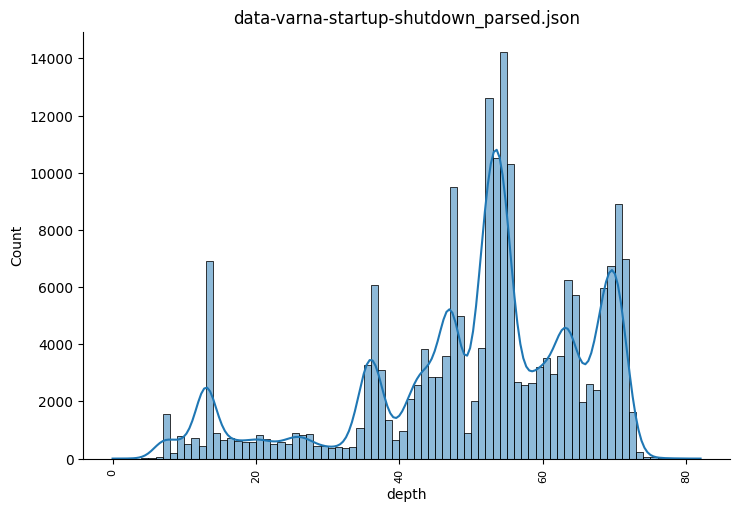

In [176]:
depthViz("displot")

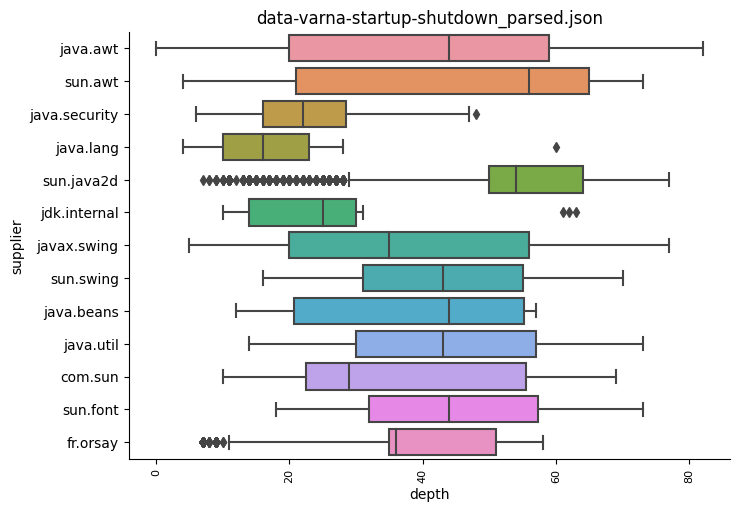

In [177]:
depthViz("catplot", "supplier")

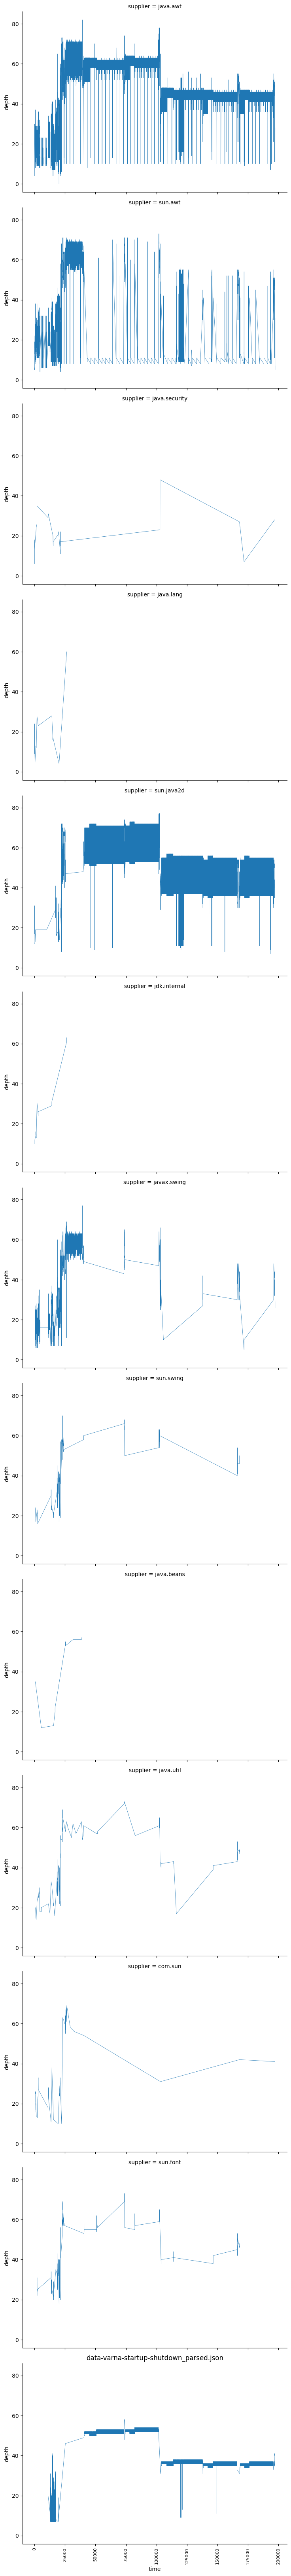

In [178]:
depthViz("relplot", "supplier")

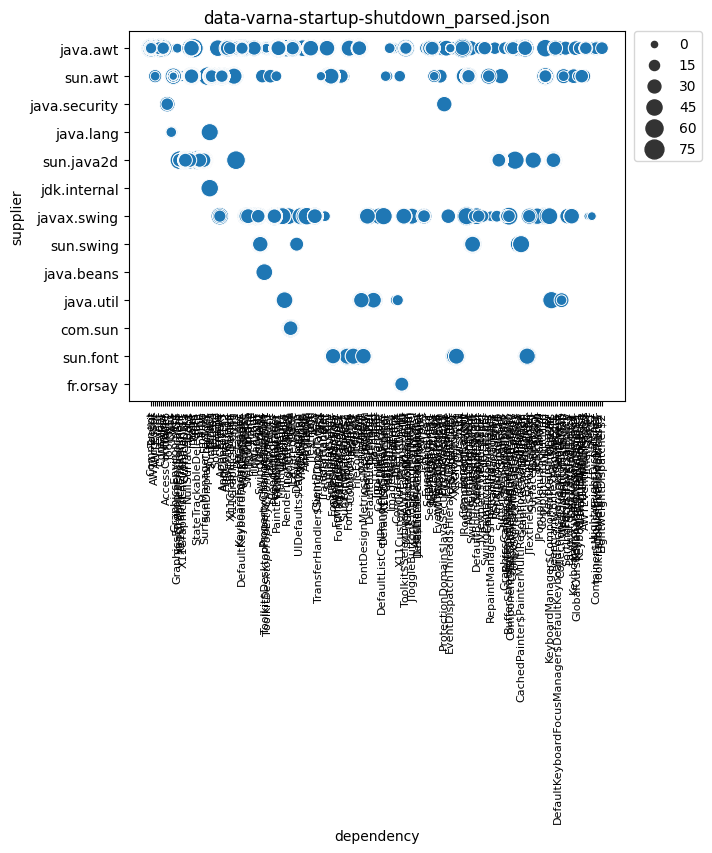

In [179]:
depthViz("scatterplot")

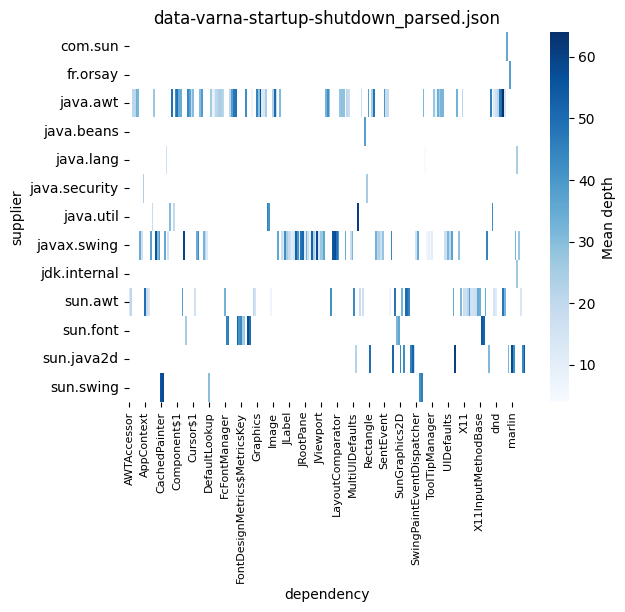

In [180]:
depthViz("heatmap")